<a href="https://colab.research.google.com/github/HoseinNekouei/LinearRegression_PyTorch/blob/main/LinearRegression_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Use the 'raw' URL to access the CSV data directly
df = pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Salary%20Data.csv')
x= df['Experience Years'].values
y= df['Salary'].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(28,) (28,) (12,) (12,)


In [5]:
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test= x_test.reshape(-1, 1)
y_test= y_test.reshape(-1, 1)

scaler= StandardScaler()

x_train= scaler.fit_transform(x_train)
y_train= scaler.fit_transform(y_train)

x_test= scaler.transform(x_test)
y_test= scaler.transform(y_test)

x_train= torch.tensor(x_train, dtype=torch.float32)
y_train= torch.tensor(y_train, dtype=torch.float32)
x_test= torch.tensor(x_test, dtype=torch.float32)
y_test= torch.tensor(y_test, dtype=torch.float32)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

torch.Size([28, 1]) torch.Size([28, 1]) torch.Size([12, 1]) torch.Size([12, 1])


In [6]:
class GrdientRegression:
    def __init__(self, x, y, eta= 0.1, num_iteration= 100 ):
        self.x= x
        self.y= y
        self.eta= eta
        self.weight= torch.randn(1)
        self.bias= torch.randn(1)
        self.num_iteration= num_iteration

    def predict(self):
        """Predict using the current weight and bias."""
        self.y_hat= (self.weight * self.x) + self.bias

    def mse(self):
        """Compute Mean Squared Error."""
        self.error = self.y_hat - self.y
        self.loss= torch.mean((self.error) ** 2)

    def calc_gradient(self):
        """Calculate gradients for weight and bias."""
        self.grad_bias = 2 * torch.mean(self.error)
        self.grad_weight= 2 * torch.mean(self.x * self.error)

    def update(self):
        """Update weight and bias using the calculated gradients."""
        self.weight -= self.eta * self.grad_weight
        self.bias -= self.eta * self.grad_bias

    def fit(self):
        """Fit model to the data """
        for index in range(self.num_iteration):
            self.predict() # Make Prediction
            self.mse() # Compute loss
            self.calc_gradient() # Calculate gradients
            self.update() # Update parameters
            print(f'fit {index}/{self.num_iteration}: loss: {self.loss:.4f}, weight: {self.weight.item():.4f}, bias: {self.bias.item():.4f}')

        return self.weight, self.bias


    def __str__(self):
        """Return a string representation of the model parameters."""
        return f'\nstar_weight: {self.weight.item():.4f}, star_bias: {self.bias.item():.4f}'



fit 0/30: loss: 2.7338, weight: 0.1252, bias: 0.4897
fit 1/30: loss: 1.0102, weight: 0.4669, bias: 0.2938
fit 2/30: loss: 0.3897, weight: 0.6719, bias: 0.1763
fit 3/30: loss: 0.1663, weight: 0.7949, bias: 0.1058
fit 4/30: loss: 0.0859, weight: 0.8687, bias: 0.0635
fit 5/30: loss: 0.0570, weight: 0.9130, bias: 0.0381
fit 6/30: loss: 0.0465, weight: 0.9396, bias: 0.0228
fit 7/30: loss: 0.0428, weight: 0.9555, bias: 0.0137
fit 8/30: loss: 0.0414, weight: 0.9651, bias: 0.0082
fit 9/30: loss: 0.0409, weight: 0.9708, bias: 0.0049
fit 10/30: loss: 0.0408, weight: 0.9743, bias: 0.0030
fit 11/30: loss: 0.0407, weight: 0.9764, bias: 0.0018
fit 12/30: loss: 0.0407, weight: 0.9776, bias: 0.0011
fit 13/30: loss: 0.0407, weight: 0.9783, bias: 0.0006
fit 14/30: loss: 0.0407, weight: 0.9788, bias: 0.0004
fit 15/30: loss: 0.0407, weight: 0.9790, bias: 0.0002
fit 16/30: loss: 0.0407, weight: 0.9792, bias: 0.0001
fit 17/30: loss: 0.0407, weight: 0.9793, bias: 0.0001
fit 18/30: loss: 0.0407, weight: 0.979

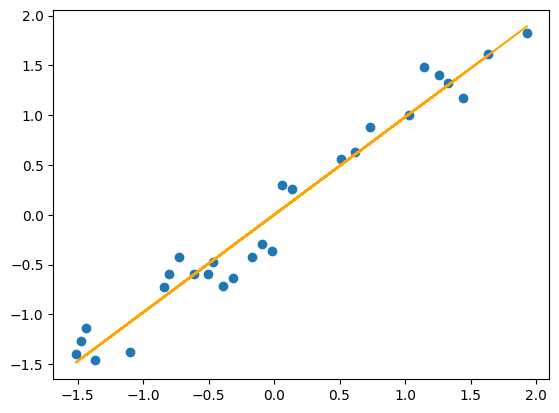

In [7]:
model = GrdientRegression(x_train, y_train, eta= 0.2, num_iteration= 30)
model.fit()
print(model)

weight= model.weight
bias= model.bias
y_hat = (x_train * weight) + bias


plt.scatter(x_train, y_train)
plt.plot(x_train, y_hat, color='orange');